Question: How does the population per county affect the rate of accidents.

In [1]:
import os
# from os import path

# Module for reading CSV files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
import plotly.express as px 

from scipy.stats import linregress
from pprint import pprint
from census import Census
gmaps.configure()


#import API keys
from JacksConfig import jack_api_key
c=Census(jack_api_key, year=2020)
from JacksConfig import jack_gkey
gmaps.configure(api_key=jack_gkey)

All_accident = 'Resources/US_Accidents_Dec21_updated.csv'
All_accident_data = pd.read_csv(All_accident)
All_accident_data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [2]:
list(All_accident_data.columns)

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [3]:
#Add column for years from Start_Time
All_accident_data['year'] = All_accident_data["Start_Time"].str[:4]
All_accident_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2016
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,Night,Night,Night,Day,2016
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,2016
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2016


In [4]:
AccidentData_2020 = All_accident_data.loc[All_accident_data['year']== "2020"]
AccidentData_2020.count()

ID                       625864
Severity                 625864
Start_Time               625864
End_Time                 625864
Start_Lat                625864
Start_Lng                625864
End_Lat                  625864
End_Lng                  625864
Distance(mi)             625864
Description              625864
Number                   237654
Street                   625864
Side                     625864
City                     625826
County                   625864
State                    625864
Zipcode                  625606
Country                  625864
Timezone                 625079
Airport_Code             624135
Weather_Timestamp        611131
Temperature(F)           606674
Wind_Chill(F)            601374
Humidity(%)              605408
Pressure(in)             609798
Visibility(mi)           607010
Wind_Direction           604001
Wind_Speed(mph)          604017
Precipitation(in)        586943
Weather_Condition        607308
Amenity                  625864
Bump    

In [5]:
#get number of accidents per county
Per_countyDF = AccidentData_2020.groupby(['State','County']).count()
Per_countyDF = Per_countyDF.drop(columns=['Severity', 'Start_Time', 'End_Time','Start_Lat',
 'Start_Lng','End_Lat','End_Lng','Distance(mi)','Number', 'Street','Side','City',
 'Zipcode','Country','Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Humidity(%)',
 'Visibility(mi)','Wind_Speed(mph)','Precipitation(in)', 'Weather_Condition','Sunrise_Sunset',
 'year','Description','Timezone','Airport_Code','Pressure(in)','Wind_Direction','Amenity','Bump',
 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Civil_Twilight', 'Nautical_Twilight', 
                                          'Astronomical_Twilight'])
Per_countyDF["# of Accidents"] = Per_countyDF["ID"]
Per_countyDF = Per_countyDF.drop(columns=["ID"])
Per_countyDF = Per_countyDF.reset_index()
Per_countyDF

,State,County,# of Accidents
0,AL,Autauga,67
1,AL,Baldwin,195
2,AL,Barbour,7
3,AL,Bibb,6
4,AL,Blount,142
...,...,...,...
2127,WV,Wood,32
2128,WY,Carbon,1
2129,WY,Fremont,2
2130,WY,Sweetwater,5


In [6]:
#Get the exact latitude per accident
Location_countyDF = AccidentData_2020[['State','County','Start_Lat','Start_Lng']]
Location_countyDF

,State,County,Start_Lat,Start_Lng
232630,DE,New Castle,39.775174,-75.480441
246924,OR,Marion,44.725203,-122.185579
247119,OR,Wasco,44.875127,-121.428011
250560,OR,Marion,44.704907,-122.231897
279132,DE,New Castle,39.783118,-75.473129
...,...,...,...,...
2362657,CA,Los Angeles,34.265778,-118.454289
2362658,CA,Kern,35.736667,-119.742500
2362659,CA,Los Angeles,34.075263,-118.281157
2372960,MI,Wayne,42.315690,-83.085920


In [7]:
# Merge dataframes to create new df consisting of the number of accidents in each county & average location of accidents in that county
Count_location = pd.merge(Per_countyDF, Location_countyDF, on=["State", "County"])
Count_location

,State,County,# of Accidents,Start_Lat,Start_Lng
0,AL,Autauga,67,32.652643,-86.427887
1,AL,Autauga,67,32.478444,-86.852414
2,AL,Autauga,67,32.594540,-86.464277
3,AL,Autauga,67,32.547806,-86.457651
4,AL,Autauga,67,32.438587,-86.425958
...,...,...,...,...,...
625859,WY,Sweetwater,5,41.553520,-109.595950
625860,WY,Sweetwater,5,40.999630,-109.430940
625861,WY,Sweetwater,5,41.524680,-109.296900
625862,WY,Teton,2,43.831727,-110.417716


In [8]:
# Create new dataframe showing number of accidents and average coordinates by county
Accidents_locations = Count_location.groupby(['State','County'], as_index=False).mean()
# Rename lat and long columns
Accidents_locations.rename(columns={"Start_Lat" : "Average Lat",
                                   "Start_Lng" : "Average Lng"}, inplace=True)
Accidents_locations

,State,County,# of Accidents,Average Lat,Average Lng
0,AL,Autauga,67,32.532288,-86.494077
1,AL,Baldwin,195,30.660429,-87.823103
2,AL,Barbour,7,31.923755,-85.253062
3,AL,Bibb,6,33.049414,-87.084622
4,AL,Blount,142,33.972992,-86.593729
...,...,...,...,...,...
2127,WV,Wood,32,39.260823,-81.482147
2128,WY,Carbon,1,41.539620,-106.080220
2129,WY,Fremont,2,43.547600,-109.666695
2130,WY,Sweetwater,5,41.477860,-108.959130


In [9]:
Accidents_locations
Accidents_locations.dtypes

State              object
County             object
# of Accidents      int64
Average Lat       float64
Average Lng       float64
dtype: object

In [10]:
#Use for abbreviating state names below
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [11]:
#Get census data per county 
# Create Census object with Census API key from the selected year
c = Census(jack_api_key, year=2020)
# Run Census Search to retrieve income data by county
census_data = c.acs5.get(("NAME", "B01002_001E","B01003_001E"),{'for':'county:*'})
# Convert to DataFrame
census_df = pd.DataFrame(census_data)
census_df.head()
# Rename columns
census_df = census_df.rename(columns={"B01002_001E": "Median Age",
                                      "B01003_001E" : "Population",
                                     "NAME": "County",
                                     "State": "State Code",
                                     "County": "County Code"})
census_df.head()
# Split “County” column into separate “County” and “State” columns
census_df[["County", "State"]] = census_df["County"].str.split("County, ", expand=True)
# Combine State and County codes into new column for county identification
census_df["County FIPS"] = census_df["state"] + census_df["county"]
# Combine State and County code columns
census_df.drop(columns=["state", "county"], inplace=True)
# Convert State names to state abbreviations
census_df.replace({"State": us_state_to_abbrev}, inplace=True)
# census_pd.replace({“State”: states_abbreviation}, inplace=True)
#Remove trailing spaces from the county column 
census_df['County']= census_df['County'].str.strip()
census_df

,County,Median Age,Population,State,County FIPS
0,Autauga,38.6,55639.0,AL,01001
1,Baldwin,43.2,218289.0,AL,01003
2,Barbour,40.1,25026.0,AL,01005
3,Bibb,39.9,22374.0,AL,01007
4,Blount,41.0,57755.0,AL,01009
...,...,...,...,...,...
3216,Renville,44.0,14572.0,MN,27129
3217,Roseau,41.6,15259.0,MN,27135
3218,Sherburne,36.1,96015.0,MN,27141
3219,Steele,39.2,36710.0,MN,27147


In [12]:
#Combine the census DF and the accident DF
Accident_AgeDF = pd.merge(Accidents_locations, census_df, how="left", on=["State", "County"])
Accident_AgeDF

,State,County,# of Accidents,Average Lat,Average Lng,Median Age,Population,County FIPS
0,AL,Autauga,67,32.532288,-86.494077,38.6,55639.0,01001
1,AL,Baldwin,195,30.660429,-87.823103,43.2,218289.0,01003
2,AL,Barbour,7,31.923755,-85.253062,40.1,25026.0,01005
3,AL,Bibb,6,33.049414,-87.084622,39.9,22374.0,01007
4,AL,Blount,142,33.972992,-86.593729,41.0,57755.0,01009
...,...,...,...,...,...,...,...,...
2127,WV,Wood,32,39.260823,-81.482147,43.8,84387.0,54107
2128,WY,Carbon,1,41.539620,-106.080220,39.2,15073.0,56007
2129,WY,Fremont,2,43.547600,-109.666695,38.5,39711.0,56013
2130,WY,Sweetwater,5,41.477860,-108.959130,35.7,43352.0,56037


In [13]:
#Calculate the number of accidents per 1000
Accident_AgeDF["Accidents Per 1000"] = Accident_AgeDF["# of Accidents"]/Accident_AgeDF["Population"] * 1000
Accident_AgeDF

,State,County,# of Accidents,Average Lat,Average Lng,Median Age,Population,County FIPS,Accidents Per 1000
0,AL,Autauga,67,32.532288,-86.494077,38.6,55639.0,01001,1.204191
1,AL,Baldwin,195,30.660429,-87.823103,43.2,218289.0,01003,0.893311
2,AL,Barbour,7,31.923755,-85.253062,40.1,25026.0,01005,0.279709
3,AL,Bibb,6,33.049414,-87.084622,39.9,22374.0,01007,0.268168
4,AL,Blount,142,33.972992,-86.593729,41.0,57755.0,01009,2.458662
...,...,...,...,...,...,...,...,...,...
2127,WV,Wood,32,39.260823,-81.482147,43.8,84387.0,54107,0.379205
2128,WY,Carbon,1,41.539620,-106.080220,39.2,15073.0,56007,0.066344
2129,WY,Fremont,2,43.547600,-109.666695,38.5,39711.0,56013,0.050364
2130,WY,Sweetwater,5,41.477860,-108.959130,35.7,43352.0,56037,0.115335


In [14]:
#add age multiplier 
Accident_AgeDF["Accidents Vs Age"]= Accident_AgeDF["Median Age"] * Accident_AgeDF["Accidents Per 1000"]
Accident_AgeDF

,State,County,# of Accidents,Average Lat,Average Lng,Median Age,Population,County FIPS,Accidents Per 1000,Accidents Vs Age
0,AL,Autauga,67,32.532288,-86.494077,38.6,55639.0,01001,1.204191,46.481784
1,AL,Baldwin,195,30.660429,-87.823103,43.2,218289.0,01003,0.893311,38.591042
2,AL,Barbour,7,31.923755,-85.253062,40.1,25026.0,01005,0.279709,11.216335
3,AL,Bibb,6,33.049414,-87.084622,39.9,22374.0,01007,0.268168,10.699920
4,AL,Blount,142,33.972992,-86.593729,41.0,57755.0,01009,2.458662,100.805125
...,...,...,...,...,...,...,...,...,...,...
2127,WV,Wood,32,39.260823,-81.482147,43.8,84387.0,54107,0.379205,16.609193
2128,WY,Carbon,1,41.539620,-106.080220,39.2,15073.0,56007,0.066344,2.600677
2129,WY,Fremont,2,43.547600,-109.666695,38.5,39711.0,56013,0.050364,1.939009
2130,WY,Sweetwater,5,41.477860,-108.959130,35.7,43352.0,56037,0.115335,4.117457


In [15]:
#look at min age, max age, min accidents per 1000, max accidents per 1000
maxage = Accident_AgeDF["Median Age"].max()
print(maxage)
minage = Accident_AgeDF["Median Age"].min()
print(minage)
MaxAcc = Accident_AgeDF["Accidents Per 1000"].max()
print(MaxAcc)
MinAcc = Accident_AgeDF["Accidents Per 1000"].min()
print(MinAcc)

68.0
23.5
116.84460260972716
0.003242626267866871


In [16]:
#Look at distribution of median age across counties

#Create bins for age brackets 
bins = [0, 25, 35, 40, 45, 50, 55, 70]
group_names = ["Under 25", "25-35", "35-40", "40-45", "45-50", "50-55", "Over 55"]

Accident_AgeDF["Ave Age Bracket"] = pd.cut(Accident_AgeDF["Median Age"], bins, labels=group_names,
                                           include_lowest=True)
Accident_AgeDF


,State,County,# of Accidents,Average Lat,Average Lng,Median Age,Population,County FIPS,Accidents Per 1000,Accidents Vs Age,Ave Age Bracket
0,AL,Autauga,67,32.532288,-86.494077,38.6,55639.0,01001,1.204191,46.481784,35-40
1,AL,Baldwin,195,30.660429,-87.823103,43.2,218289.0,01003,0.893311,38.591042,40-45
2,AL,Barbour,7,31.923755,-85.253062,40.1,25026.0,01005,0.279709,11.216335,40-45
3,AL,Bibb,6,33.049414,-87.084622,39.9,22374.0,01007,0.268168,10.699920,35-40
4,AL,Blount,142,33.972992,-86.593729,41.0,57755.0,01009,2.458662,100.805125,40-45
...,...,...,...,...,...,...,...,...,...,...,...
2127,WV,Wood,32,39.260823,-81.482147,43.8,84387.0,54107,0.379205,16.609193,40-45
2128,WY,Carbon,1,41.539620,-106.080220,39.2,15073.0,56007,0.066344,2.600677,35-40
2129,WY,Fremont,2,43.547600,-109.666695,38.5,39711.0,56013,0.050364,1.939009,35-40
2130,WY,Sweetwater,5,41.477860,-108.959130,35.7,43352.0,56037,0.115335,4.117457,35-40


In [17]:
#Create variable for each age group

Under_25 = Accident_AgeDF['Ave Age Bracket'].value_counts()["Under 25"]
a25_a35 = Accident_AgeDF['Ave Age Bracket'].value_counts()["25-35"]
a35_a40 = Accident_AgeDF['Ave Age Bracket'].value_counts()["35-40"]
a40_a45 = Accident_AgeDF['Ave Age Bracket'].value_counts()["40-45"]
a45_a50 = Accident_AgeDF['Ave Age Bracket'].value_counts()["45-50"]
a50_a55 = Accident_AgeDF['Ave Age Bracket'].value_counts()["50-55"]
Over_55 = Accident_AgeDF['Ave Age Bracket'].value_counts()["Over 55"]

#combine brackets into a list
AgeBracketCounts = [Under_25, a25_a35, a35_a40, a40_a45, a45_a50, a50_a55, Over_55]
AgeBracketCounts

[3, 183, 625, 767, 319, 109, 23]

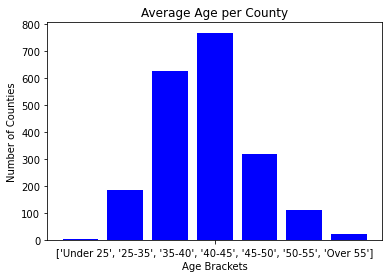

In [18]:
#bar graph to show the number of accidents in each age bracket
x_axis=np.arange(len(AgeBracketCounts))
plt.title("Average Age per County")
plt.xlabel("Age Brackets")
plt.ylabel("Number of Counties")
tick_locations = [value for value in AgeBracketCounts]
plt.xticks(tick_locations, [group_names])
plt.bar(x_axis, AgeBracketCounts,color="blue")
plt.savefig('Images/AveCountyAgeCount.png')

In [19]:
#Define county locations and # of Accidents for gmaps
CountyLocations = Accident_AgeDF[["Average Lat", "Average Lng"]]
AccidentsVsAge = Accident_AgeDF['Accidents Vs Age'].astype(float)

In [20]:
#Creating the visual 
fig = gmaps.figure(layout={
        'width': '400px',
        'height': '600px',
        'padding': '3px',
        'border': '1px solid black'
})

#add locations
markers = gmaps.marker_layer(CountyLocations)

#create/add heat layer
Heatmap = gmaps.heatmap_layer(CountyLocations, weights=AccidentsVsAge,
                             dissipating=False, max_intensity=5500,
                             point_radius=1)
Heatmap.gradient = ['gray', 'yellow', 'blue', 'red']
Heatmap.opacity = 0.7
fig.add_layer(Heatmap)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', padding='3px', width='400px'))

## Juan's Section

In [ ]:
All_accident_data['year'] = All_accident_data["Start_Time"].str[:4]
All_accident_data.head()

In [ ]:
AccidentData_2021 = All_accident_data.loc[All_accident_data['year']== "2021"]
AccidentData_2021.count()

In [ ]:
AccidentData_2021 = AccidentData_2021.drop(columns=["Astronomical_Twilight","Nautical_Twilight", "Civil_Twilight", \
                                           "Turning_Loop", "Traffic_Signal", "Traffic_Calming",\
                                           "Stop", "Station", "Roundabout", "Railway", "Amenity",\
                                           "No_Exit", "Junction", "Give_Way", "Crossing", "Bump", \
                                           "Pressure(in)", "Wind_Direction", "Airport_Code", "Timezone",\
                                           "Description"])
AccidentData_2021.head()

In [ ]:
AccidentData_2021['month'] = AccidentData_2021["Start_Time"].str[5:7]

AccidentData_2021['month']=AccidentData_2021['month'].astype("int")
AccidentData_2021.head()

In [ ]:
accident_count = AccidentData_2021.groupby(["month"]).count()[["ID"]]
accident_count.rename(columns={'ID':'Accidents'},inplace=True)
accident_count

In [ ]:
accident_count.plot.line()
accident_count.rename(columns={'ID':'Accidents'},inplace=True)
plt.xticks(accident_count.index)
#plt.minorticks_on()
plt.show()

In [ ]:
Christmas = AccidentData_2021[(AccidentData_2021["Start_Time"].str[5:10] == "12-24")]
New_Years = AccidentData_2021[(AccidentData_2021["Start_Time"].str[5:10] == "01-01")]
Thanksgiving = AccidentData_2021[(AccidentData_2021["Start_Time"].str[5:10] == "11-25")]
Fourth_of_July= AccidentData_2021[(AccidentData_2021["Start_Time"].str[5:10] == "07-04")]
Halloween=AccidentData_2021[(AccidentData_2021["Start_Time"].str[5:10] == "10-31")]
St_Patrick=AccidentData_2021[(AccidentData_2021["Start_Time"].str[5:10] == "03-17")]

In [ ]:
Christmas_count = Christmas.count()[["ID"]]
New_years_count = New_Years.count()[["ID"]]
Thanksgiving_count = Thanksgiving.count()[["ID"]]
Fourth_of_July_count = Fourth_of_July.count()[["ID"]]
Halloween_count = Halloween.count()[["ID"]]
St_patrick_count = St_Patrick.count()[["ID"]]



Christmas_count

In [ ]:
Holiday_accidents = pd.DataFrame({"Christmas": Christmas_count,
                                    "New Years": New_years_count, 
                                    "Thanksgiving": Thanksgiving_count,
                                    "Fourth of July": Fourth_of_July_count,
                                     "Halloween": Halloween_count,
                                     "St Patty": St_patrick_count}) 
 
Holiday_accidents_transpose= Holiday_accidents.transpose()
Holiday_accidents_transpose.rename(columns={'ID':'Accidents'},inplace=True)

Holiday_accidents_transpose.head()

In [ ]:
Holiday_accidents_transpose.plot.bar()

## Glen's Section

In [ ]:
# Read in original csv file as dataframe
accidents_csv = pd.read_csv("Resources/US_Accidents_Dec21_updated.csv")

# Display first 5 rows of dataframe
accidents_csv.head()

In [ ]:
# Create new column consisting of only the year
accidents_csv["Year"] = accidents_csv["Start_Time"].str[:4]

# Display first 5 rows
accidents_csv.head()

In [ ]:
# Clean dataframe by limiting to selected columns
accidents_cleaned_df = accidents_csv[['Start_Time', 'Start_Lat', 'Start_Lng', 'County', 'State', 'Country','Year']]

# Display first 5 rows of cleaned df
accidents_cleaned_df.head()

In [ ]:
## Create separate csv files for each year from 2016 to 2021

# List comprehension to create list of years included in datases cast as strings
years = [str(year) for year in range(2016,2022)]

# For loop to iterate through and export a separate csv file for data from each year
for yr in years:
    current_year_df = accidents_cleaned_df[accidents_cleaned_df["Year"] == yr]
    current_year_df.to_csv(f"Resources/accidents_{yr}.csv", index=False)

## Organize Data - START HERE

In [ ]:
# Designate selected year for dataframe
selected_year = "2020"

# Read in csv file for selected year as accidents_df
accidents_selected_year_df = pd.read_csv(f"Resources/accidents_{selected_year}.csv")

# Display first 5 rows of dataframe
accidents_selected_year_df.head()

In [ ]:
# Create dataframe by grouping by "State" and "County" to get the number of total accidents in each county
county_count = accidents_selected_year_df.groupby(["State", "County"]).count()[["Start_Time"]]

# Display first 5 rows of dataframe
county_count.head()

In [ ]:
# Select State, Country, and Start Lat/Lng columns as new dataframe
locations_df = accidents_selected_year_df[["State", "County", "Start_Lat", "Start_Lng"]]

# Merge dataframes to create new df consisting of the number of accidents in each county and the exact location of each
county_location_count = pd.merge(locations_df, county_count, on=["State", "County"])

In [ ]:
#Rename columns
county_location_count.rename(columns={"Start_Time" : "Accident Count", 
                                        "Start_Lat" : "Lat", 
                                        "Start_Lng" : "Lng"}, inplace=True)

# Sort dataframe by state name
county_location_count.sort_values("State", inplace=True)

# Display first 5 rows of dataframe
county_location_count.head()

In [ ]:
# Create new dataframe showing number of accidents and average coordinates by county
accidents_by_county = county_location_count.groupby(["State", "County"], as_index=False).mean()

# Display first 5 rows of dataframe
accidents_by_county

In [ ]:
# Create dictionary for converting state names and abbreviations

states_abbreviation = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

## Import INformation from Census API

In [ ]:
# Create Census object with Census API key from the selected year
c = Census(jack_api_key, year=int(selected_year))

# Run Census Search to retrieve income data by county
census_data = c.acs5.get(("NAME", "B01003_001E", "B19013_001E","B19301_001E"), {'for': 'county:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Rename columns
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Median Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "NAME": "County",
                                      "state": "State Code",
                                      "county": "County Code"})

# Split "County" column into separate "County" and "State" columns
census_pd[["County", "State"]] = census_pd["County"].str.split(" County, ", expand=True)

# Combine State and County codes into new column for county identification
census_pd["County FIPS"] = census_pd["State Code"] + census_pd["County Code"]

# Drop State and County code columns
census_pd.drop(columns=["State Code", "County Code"], inplace=True)

# Convert State names to state abbreviations
census_pd.replace({"State": states_abbreviation}, inplace=True)

census_pd

In [ ]:
# Merge census data with accident dataframe on State/County for counties listed in accidents_by_county dataframe
accidents_census_df = pd.merge(census_pd, accidents_by_county, on=["State","County"], how="left")

# Calculate accidents per capita and add to new column
accidents_census_df["Accidents (per 1000)"] = (accidents_census_df["Accident Count"] / accidents_census_df["Population"]) * 1000

# Drop rows with missing data
accident_data_complete = accidents_census_df.dropna()

# Save dataframe as csv file
accident_data_complete.to_csv("Resources/accidents_census_bycounty.csv")

# Display first 5 rows of dataframe
accident_data_complete

In [ ]:
# Read in csv file as new cleaned dataframe
accident_data_complete = pd.read_csv("Resources/accidents_census_bycounty.csv", dtype={'County FIPS': str})

accident_data_complete.head()

## Visualize Data

### Heatmap of Accidents (per capita) by County

In [ ]:
# Store 'Lat' and 'Lng' into  locations 
locations = accident_data_complete[["Lat", "Lng"]]

# median_income = accident_data_complete["Median Household Income"]
accidents_per_1000 = accident_data_complete["Accidents (per 1000)"]

# Create an Accidents Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=accidents_per_1000, 
                                 dissipating=False, max_intensity=30,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

## Accidents (per capita) by County

In [ ]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
counties = requests.get(url).json()

fig = px.choropleth(accident_data_complete, geojson=counties, locations="County FIPS", color="Accidents (per 1000)",
                           color_continuous_scale=px.colors.sequential.Sunsetdark,
                           range_color=(0, 12),
                           scope="usa",
                           labels={"color":"Accidents (per 1000)"}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Scatterplot of Median Income vs. Accidents per 1000 (by County)

In [ ]:
plt.style.use('fivethirtyeight')

x_values = accident_data_complete["Accidents (per 1000)"]
y_values = accident_data_complete["Median Household Income"]

# Unpack linregress tuple of x and y values to store slope, y-intercept, rvalue, pvalue, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the line equation as a string in slope-intercept form
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"

# Calculate y-values of regression line from the x_values parameter, slope and y-intercept
regress_values = slope * x_values + intercept

# Print the r-value (correlation coefficient)
print(f"The r-value is: {rvalue}")

# Set up scatter plot of x_values vs y_values including regression line and line equation
plt.scatter(x_values, y_values, s=50, edgecolors="black", alpha=0.75)
plt.title(f"Median Income vs. Car Accidents (per capita) in {selected_year}")
plt.xlabel("Accidents (per 1000 people)")
plt.ylabel("Median Household Income")
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq, xy=(75,100000),fontsize=15,color="red")
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')

x_values = accident_data_complete["Population"]
y_values = accident_data_complete["Accidents (per 1000)"]

# Unpack linregress tuple of x and y values to store slope, y-intercept, rvalue, pvalue, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the line equation as a string in slope-intercept form
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"

# Calculate y-values of regression line from the x_values parameter, slope and y-intercept
regress_values = slope * x_values + intercept

# Print the r-value (correlation coefficient)
print(f"The r-value is: {rvalue}")

# Set up scatter plot of x_values vs y_values including regression line and line equation
plt.scatter(x_values, y_values, s=50, edgecolors="black", alpha=0.75)
plt.title(f"Car Accidents (per capita) vs. County Population in {selected_year}")
plt.xlabel("County Population")
plt.ylabel("Accidents (per 1000 people)")
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq, xy = (600000,100), fontsize=15,color="red")

# plt.xscale("log")
# plt.yscale("log")

plt.show()

## Madina's Section

In [22]:
All_accident = 'Resources/US_Accidents_Dec21_updated.csv'
All_accident_data = pd.read_csv(All_accident)

All_accident_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [23]:
for col in All_accident_data.columns: 
    print(col)

ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [24]:
All_accident_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [25]:
All_accident_data['year'] = All_accident_data["Start_Time"].str[:4]
All_accident_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2016
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,Night,Night,Night,Day,2016
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,2016
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2016


In [26]:
AccidentData_2021 = All_accident_data.loc[All_accident_data['year']== "2021"]
AccidentData_2021.count()

ID                       1511745
Severity                 1511745
Start_Time               1511745
End_Time                 1511745
Start_Lat                1511745
Start_Lng                1511745
End_Lat                  1511745
End_Lng                  1511745
Distance(mi)             1511745
Description              1511745
Number                    707038
Street                   1511743
Side                     1511745
City                     1511684
County                   1511745
State                    1511745
Zipcode                  1511230
Country                  1511745
Timezone                 1510157
Airport_Code             1505849
Weather_Timestamp        1486395
Temperature(F)           1479262
Wind_Chill(F)            1469327
Humidity(%)              1477481
Pressure(in)             1483543
Visibility(mi)           1479284
Wind_Direction           1473371
Wind_Speed(mph)          1473375
Precipitation(in)        1447075
Weather_Condition        1479142
Amenity   

In [27]:
AccidentData_2021 = AccidentData_2021.drop(columns=["Astronomical_Twilight","Nautical_Twilight", "Civil_Twilight", \
                                           "Turning_Loop", "Traffic_Signal", "Traffic_Calming",\
                                           "Stop", "Station", "Roundabout", "Railway", "Amenity",\
                                           "No_Exit", "Junction", "Give_Way", "Crossing", "Bump", \
                                           "Pressure(in)", "Wind_Direction", "Airport_Code", "Timezone",\
                                           "Description"])
AccidentData_2021

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,year
224945,A-224946,2,2021-03-10 19:57:00,2021-03-11 05:28:02,42.382359,-71.022318,42.383346,-71.021204,0.089,NaN,...,2021-03-10 19:54:00,42.0,36.0,60.0,10.0,12.0,0.0,Fair,Night,2021
224946,A-224947,2,2021-07-30 23:37:00,2021-07-31 03:22:58,40.908676,-123.707116,40.904856,-123.740056,1.740,35679.0,...,2021-07-30 23:50:00,54.0,54.0,100.0,2.0,6.0,0.0,Fog,Night,2021
224947,A-224948,2,2021-10-15 16:42:36,2021-10-15 17:02:36,38.970628,-77.116333,38.973149,-77.121876,0.345,NaN,...,2021-10-15 16:52:00,79.0,79.0,62.0,10.0,9.0,0.0,Mostly Cloudy,Day,2021
224948,A-224949,2,2021-12-21 11:42:00,2021-12-21 12:21:00,47.642651,-122.318590,47.643411,-122.308460,0.474,NaN,...,2021-12-21 11:53:00,38.0,38.0,86.0,10.0,0.0,0.0,Cloudy,Day,2021
224949,A-224950,2,2021-12-09 08:51:00,2021-12-09 11:01:22,37.419536,-122.090640,37.410966,-122.076087,0.994,NaN,...,2021-12-09 08:55:00,52.0,52.0,71.0,10.0,9.0,0.0,Fair,Day,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068385,A-2068386,2,2021-01-01 00:04:00,2021-01-01 01:20:44,33.932945,-118.280711,33.929954,-118.281052,0.208,NaN,...,2021-01-01 00:53:00,49.0,49.0,54.0,7.0,0.0,0.0,Fair,Night,2021
2068522,A-2068523,2,2021-01-01 01:42:00,2021-01-01 03:51:09,34.172340,-118.532685,34.173440,-118.539715,0.409,NaN,...,2021-01-01 01:51:00,55.0,55.0,33.0,10.0,8.0,0.0,Fair,Night,2021
2068635,A-2068636,2,2021-01-01 03:00:33,2021-01-01 05:00:33,44.069885,-121.306432,44.067645,-121.307392,0.162,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night,2021
2068931,A-2068932,2,2021-01-01 02:26:00,2021-01-01 06:15:49,37.998126,-121.811133,37.997990,-121.810109,0.057,NaN,...,2021-01-01 02:53:00,41.0,41.0,86.0,9.0,3.0,0.0,Fair,Night,2021


In [28]:
AccidentData_2021.to_csv("Cleaned2021Data.csv")

In [29]:
# Dropping all null values from the data
AccidentData_2021=AccidentData_2021.dropna()

In [30]:
# Changing column values to integer
AccidentData_2021.iloc[:, range(18,24)].astype(int)

,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
224946,54,54,100,2,6,0
224951,76,76,71,10,10,0
224953,49,47,33,10,6,0
224956,87,87,55,10,10,0
224957,95,95,46,10,14,0
...,...,...,...,...,...,...
2064783,74,74,82,10,15,0
2064972,48,44,93,10,9,0
2067189,70,70,90,10,13,0
2067590,46,43,63,10,6,0


In [31]:
# Grouping similar weather types and creating as a new column 'Weather_Category'
weather_cats = {
    "Fair": ["Fair"],
    "Cloudy": ['Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Partly Cloudy / Windy','Haze', 'Haze / Windy', 'Cloudy / Windy','Mostly Cloudy / Windy'],
"Foggy": ['Foggy', 'Fog','Patches of Fog', 'Shallow Fog','Fog / Windy', 'Partial Fog','Smoke','Smoke / Windy','Drizzle and Fog'],
"Rainy": ['Rainy', 'Light Rain','Rain', 'Light Drizzle','Heavy Rain / Windy', 'Heavy Rain', 'Light Rain Shower','Sleet','Drizzle', 'T-Storm', 'Heavy Drizzle', 'Heavy T-Storm', 'Light Rain with Thunder','Mist / Windy', 'Thunder','Thunder in the Vicinity','Rain / Windy', 'Light Freezing Rain / Windy','Mist', 'Light Drizzle / Windy', 'Showers in the Vicinity','Heavy T-Storm / Windy','Freezing Drizzle', 'Light Freezing Rain', 'Thunder / Windy','Thunder / Wintry Mix / Windy', 'Freezing Rain', 'Mist / Windy','T-Storm / Windy', 'Rain Shower','Drizzle / Windy','Light Freezing Drizzle', 'Light Rain Shower / Windy', 'Heavy Rain Shower', 'Thunder and Hail'],
"Snowy": ['Snowy', 'Light Snow','Light Snow / Windy','Snow', 'Wintry Mix','Heavy Snow', 'Heavy Snow / Windy','Light Sleet','Snow / Windy', 'Blowing Snow / Windy','Snow and Sleet','Wintry Mix / Windy','Snow and Sleet / Windy','Blowing Snow','Sleet / Windy','Light Snow and Sleet / Windy','Drifting Snow', 'Light Snow Shower','Light Sleet / Windy','Sleet / Windy'],
"Windy":['Windy','Fair / Windy','Squalls / Windy','Blowing Dust / Windy','Blowing Dust','Sand / Dust Whirls Nearby', 'Widespread Dust']
}

In [32]:
weather = {}
for cat, l in weather_cats.items():
    for item in l:
        weather[item] = cat

In [34]:
default_value = "Other"
AccidentData_2021['Weather_Category'] = AccidentData_2021['Weather_Condition'].apply(lambda x: weather.get(x, default_value))


C:\Anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



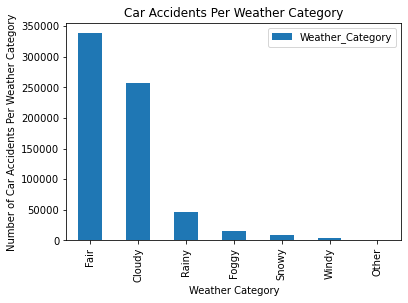

<Figure size 432x288 with 0 Axes>

In [35]:
# Generate a bar plot showing the total number of Car Accidents per Weather Category.
each_weather_condition = pd.DataFrame(pd.value_counts(AccidentData_2021["Weather_Category"]))
each_weather_condition
each_weather_condition.plot(kind = "bar")
plt.title("Car Accidents Per Weather Category")
plt.ylabel("Number of Car Accidents Per Weather Category")
plt.xlabel("Weather Category")
plt.savefig("accident_weather.png")
plt.show()
plt.tight_layout()

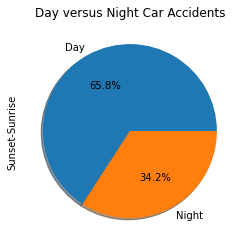

In [36]:
# Pie chart for Car Accidents verses Sunset-Sunri
sunset_sunrise_count=AccidentData_2021["Sunrise_Sunset"].value_counts()
colors = ["tab:blue", "tab:orange"]
explode = [0, 0]
sun_count = sunset_sunrise_count.index.values.tolist()
plt.pie(sunset_sunrise_count, explode=explode, labels=sun_count, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Day versus Night Car Accidents")
plt.ylabel('Sunset-Sunrise',fontsize = 10)
plt.savefig("Sunset-SunrisePy.png")
plt.show()

In [37]:
AccidentData_2021['Temperature(F)'].unique()

array([ 54.,  76.,  49.,  87.,  95.,  80.,  84.,  79.,  83.,  46.,  45.,
        74.,  69.,  77.,  63.,  72.,  61.,  89.,  29.,  73.,  82.,  47.,
        81.,  70.,  67.,  50.,  55.,  90.,  53.,  62.,  71.,  36.,  41.,
        68.,  66.,  88.,  59.,  52.,  25.,  -9.,  13.,  43.,  78.,  94.,
        75.,  33.,  39.,  64.,  86., 105.,  65.,  38.,  60.,  91.,  32.,
        58.,  85.,  96.,  35.,  37.,  30.,  57.,  97., 100.,  26.,  27.,
        28.,  48.,  42.,  93.,  23.,  44.,  51.,  92.,  56., 106.,  40.,
        34.,  99.,   9.,  31.,  21.,  14., 108.,  98.,  18.,  -1.,  20.,
       107., 102.,  15., 103., 104.,  17., 111.,  12.,  10.,  -5.,  22.,
       101.,  24.,  -8.,   1.,   3., -18.,   5.,  16., 110.,   6., 109.,
         7.,  11.,  -4.,   2.,  19.,   8.,  -6.,  -2., -13., 156.,   4.,
       112.,   0., -15., 113., -14.,  -7.,  -3., 115., -11., -10., -20.,
       196., 114., 117., -17., 136., -16., 116., -21., -19., -22., -12.,
       -26., -24., -27., -23., -25.])

In [38]:
# Create bins for temperature brackets
bins=[-30, 0, 30, 60, 90, 120]
group_names = ["Under 0", "0 to 30", "30 to 60", "60 to 90", "Over 100"]
AccidentData_2021["Temperature(F)"]=pd.cut(AccidentData_2021["Temperature(F)"], bins=bins, labels=group_names)
AccidentData_2021

C:\Anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,year,Weather_Category
224946,A-224947,2,2021-07-30 23:37:00,2021-07-31 03:22:58,40.908676,-123.707116,40.904856,-123.740056,1.740,35679.0,...,30 to 60,54.0,100.0,2.0,6.0,0.00,Fog,Night,2021,Foggy
224951,A-224952,2,2021-12-30 12:19:00,2021-12-30 15:06:09,28.472602,-81.394669,28.472574,-81.397147,0.151,1106.0,...,60 to 90,76.0,71.0,10.0,10.0,0.00,Partly Cloudy,Day,2021,Cloudy
224953,A-224954,2,2021-04-01 14:27:06,2021-04-01 16:07:07,38.946272,-94.364340,38.948519,-94.361944,0.202,641.0,...,30 to 60,47.0,33.0,10.0,6.0,0.00,Fair,Day,2021,Fair
224956,A-224957,2,2021-09-12 11:02:13,2021-09-12 12:17:13,29.672940,-95.263134,29.675054,-95.260322,0.223,8535.0,...,60 to 90,87.0,55.0,10.0,10.0,0.00,Mostly Cloudy,Day,2021,Cloudy
224957,A-224958,2,2021-08-21 16:10:05,2021-08-21 18:49:06,29.671760,-95.262012,29.673874,-95.259174,0.224,8001.0,...,Over 100,95.0,46.0,10.0,14.0,0.00,Partly Cloudy,Day,2021,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064783,A-2064784,2,2021-01-01 03:08:00,2021-01-01 06:48:34,25.947194,-80.245504,25.948197,-80.245554,0.069,18997.0,...,60 to 90,74.0,82.0,10.0,15.0,0.00,Mostly Cloudy,Night,2021,Cloudy
2064972,A-2064973,2,2021-01-01 02:21:46,2021-01-01 04:01:29,35.784219,-78.622147,35.784484,-78.622138,0.018,321.0,...,30 to 60,44.0,93.0,10.0,9.0,0.01,Light Drizzle,Night,2021,Rainy
2067189,A-2067190,2,2021-01-01 04:33:00,2021-01-01 06:08:33,27.529989,-82.507549,27.529619,-82.508809,0.081,5674.0,...,60 to 90,70.0,90.0,10.0,13.0,0.00,Fair,Night,2021,Fair
2067590,A-2067591,2,2021-01-01 02:06:00,2021-01-01 05:16:20,34.271743,-118.924741,34.275462,-118.927360,0.297,4651.0,...,30 to 60,43.0,63.0,10.0,6.0,0.00,Fair,Night,2021,Fair


In [39]:
# Create variable for each temperature group

t30_to_zero = AccidentData_2021['Temperature(F)'].value_counts()["Under 0"]
tzero_t30 = AccidentData_2021['Temperature(F)'].value_counts()["0 to 30"]
t30_t60 = AccidentData_2021['Temperature(F)'].value_counts()["30 to 60"]
t60_t90 = AccidentData_2021['Temperature(F)'].value_counts()["60 to 90"]
Over_100 = AccidentData_2021['Temperature(F)'].value_counts()["Over 100"]

#combine brackets into a list
TempCounts = [t30_to_zero, tzero_t30, t30_t60, t60_t90, Over_100]
TempCounts

[1153, 24150, 209581, 408109, 26868]

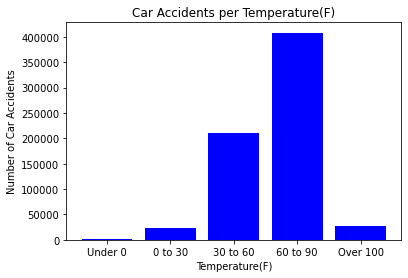

In [40]:
#bar graph to show the number of accidents in each age bracket
x_axis=np.arange(len(TempCounts))
plt.title("Car Accidents per Temperature(F)")
plt.xlabel("Temperature(F)")
plt.ylabel("Number of Car Accidents")
tick_locations = [value for value in TempCounts]
plt.xticks([0, 1, 2, 3, 4], ["Under 0", "0 to 30", "30 to 60", "60 to 90", "Over 100"])
plt.bar(x_axis, TempCounts,color="blue")
plt.savefig("accidents_per_temp.png")